In [1]:
%config InlineBackend.figure_formats = ['retina']

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from keras.layers import Dense, Activation
from keras.models import Sequential

# Import data

In [3]:
data = pd.read_csv('./data/SeoulBikeData.csv', encoding='latin1')

In [4]:
data.Date = pd.to_datetime(data.Date, dayfirst=True)

# Change string values to integers

In [5]:
data['Functioning Day'] = (data['Functioning Day']=='Yes').astype(int)

In [6]:
data['Holiday'] = (data['Holiday']=='Holiday').astype(int)

In [7]:
data = data.replace({'Seasons': {'Winter': 0, 'Spring': 1, 'Summer': 2, 'Autumn': 3}})

In [8]:
data = data.set_index(data.Date).drop('Date', axis=1)

In [9]:
data

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
Date,,,,,,,,,,,,,
2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,1
2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,1
2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,1
2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,1
2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,3,0,1
2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,3,0,1
2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,3,0,1


In [10]:
X, y = data.drop('Rented Bike Count', axis=1), data['Rented Bike Count']

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.33)

In [42]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# SVR

In [43]:
regr = SVR(C=100)
regr.fit(x_train, y_train)

SVR(C=100)

In [44]:
regr.score(x_train, y_train), regr.score(x_test, y_test)

(0.7353160825882457, 0.7256460715529922)

In [45]:
y_pred_svr = regr.predict(x_test)

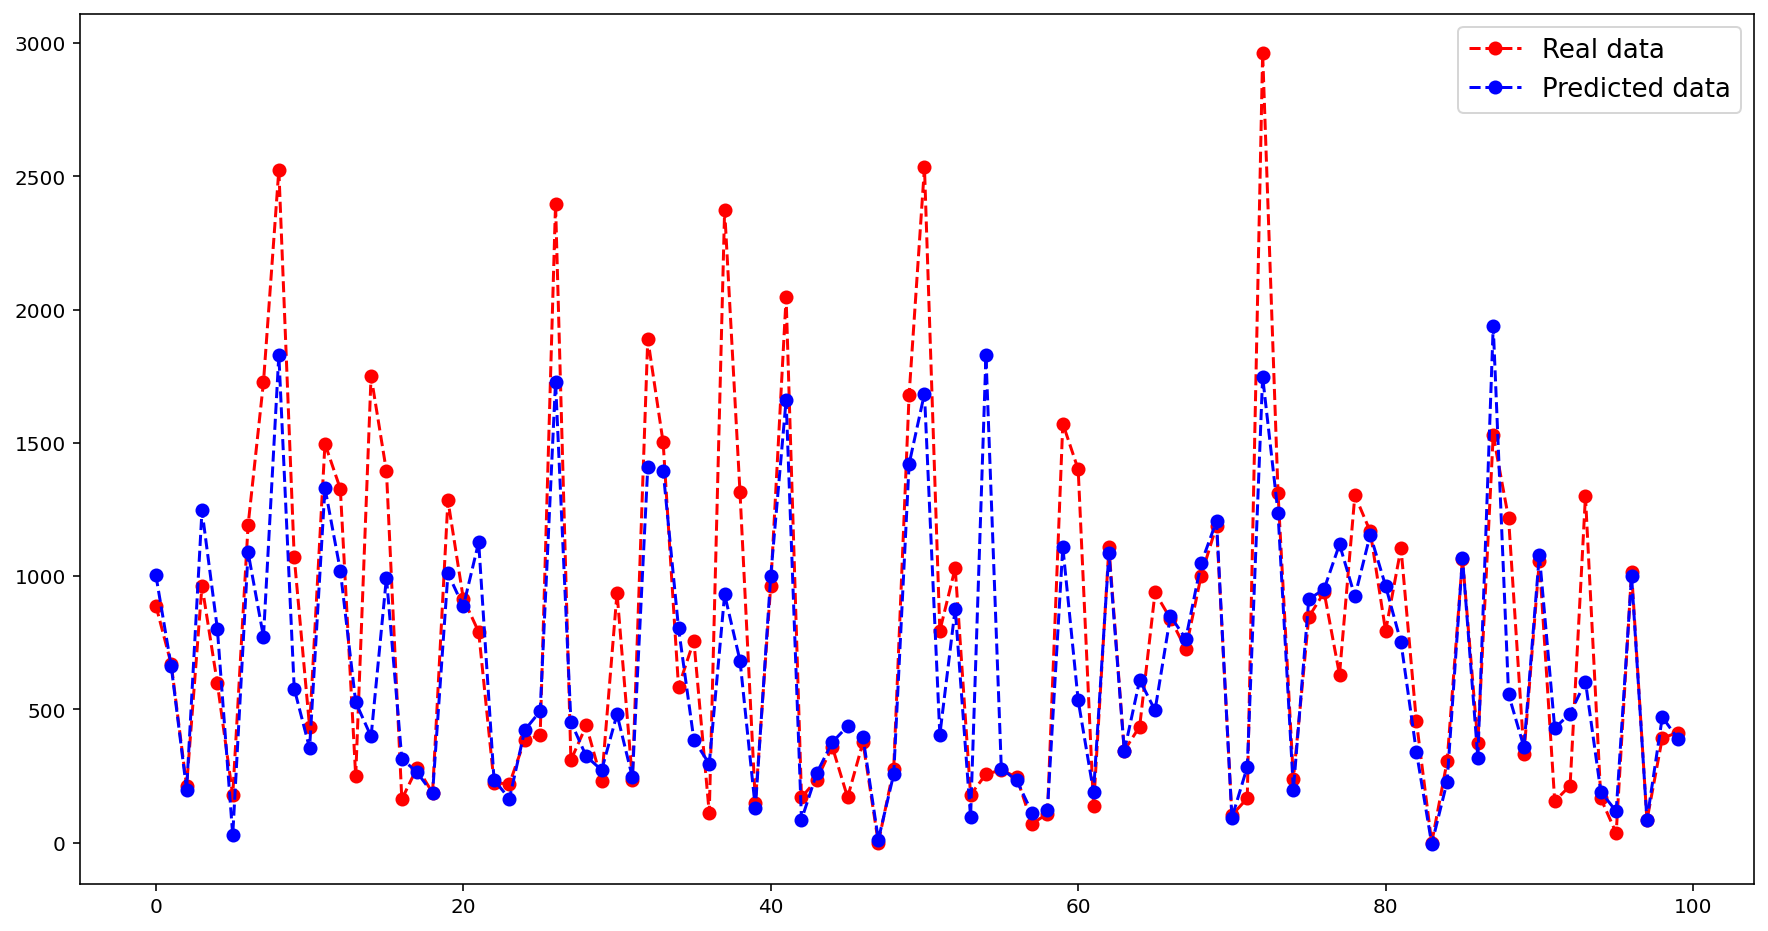

In [46]:
plt.figure(figsize=(15,8))
plt.plot(y_test.values[100:200], color = 'r', marker='o', linestyle='--', label = 'Real data')
plt.plot(y_pred_svr[100:200], color = 'b', marker='o', linestyle='--', label = 'Predicted data')
plt.legend(fontsize=13)
plt.show()

# Lasso

In [47]:
lasso = Lasso(alpha=0.1, max_iter=5000)
lasso.fit(x_train, y_train)

Lasso(alpha=0.1, max_iter=5000)

In [48]:
lasso.score(x_train, y_train), lasso.score(x_test, y_test)

(0.5429277191974408, 0.547020554215312)

In [49]:
y_pred_lasso = lasso.predict(x_test)

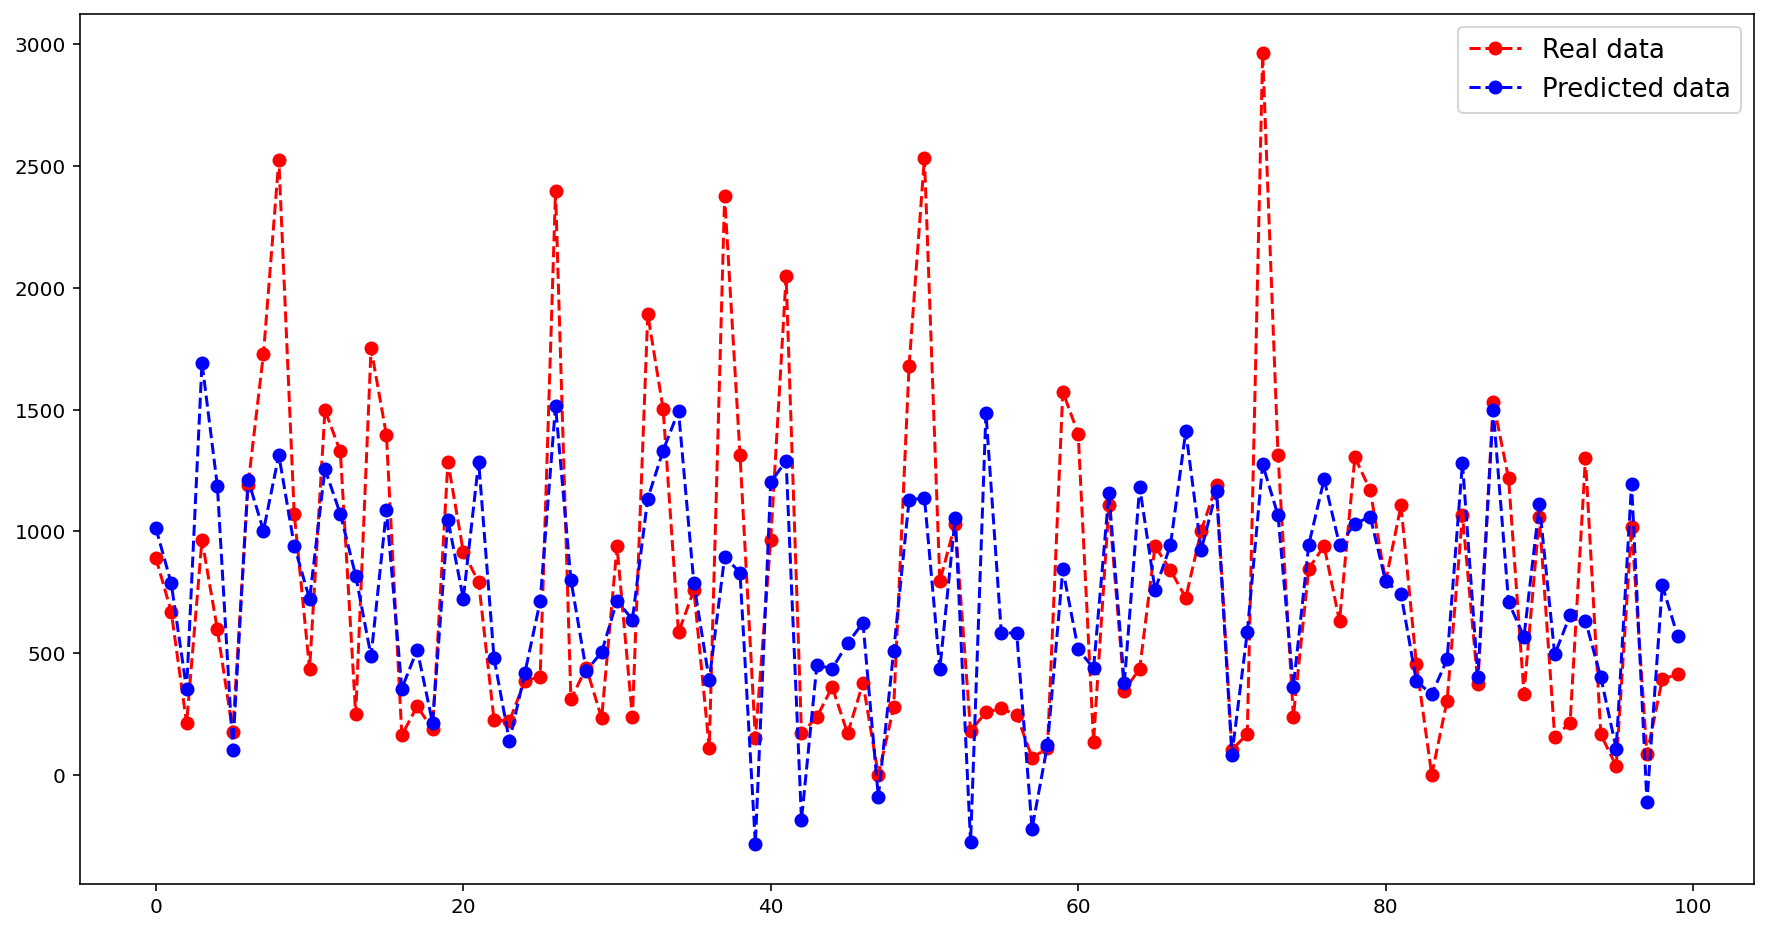

In [50]:
plt.figure(figsize=(15,8))
plt.plot(y_test.values[100:200], color = 'r', marker='o', linestyle='--', label = 'Real data')
plt.plot(y_pred_lasso[100:200], color = 'b', marker='o', linestyle='--', label = 'Predicted data')
plt.legend(fontsize=13)
plt.show()

# Ridge

In [51]:
ridge = Ridge()
ridge.fit(x_train, y_train)

Ridge()

In [52]:
ridge.score(x_train, y_train), ridge.score(x_test, y_test)

(0.5429289395322809, 0.5469775110893389)

In [53]:
y_pred_ridge = ridge.predict(x_test)

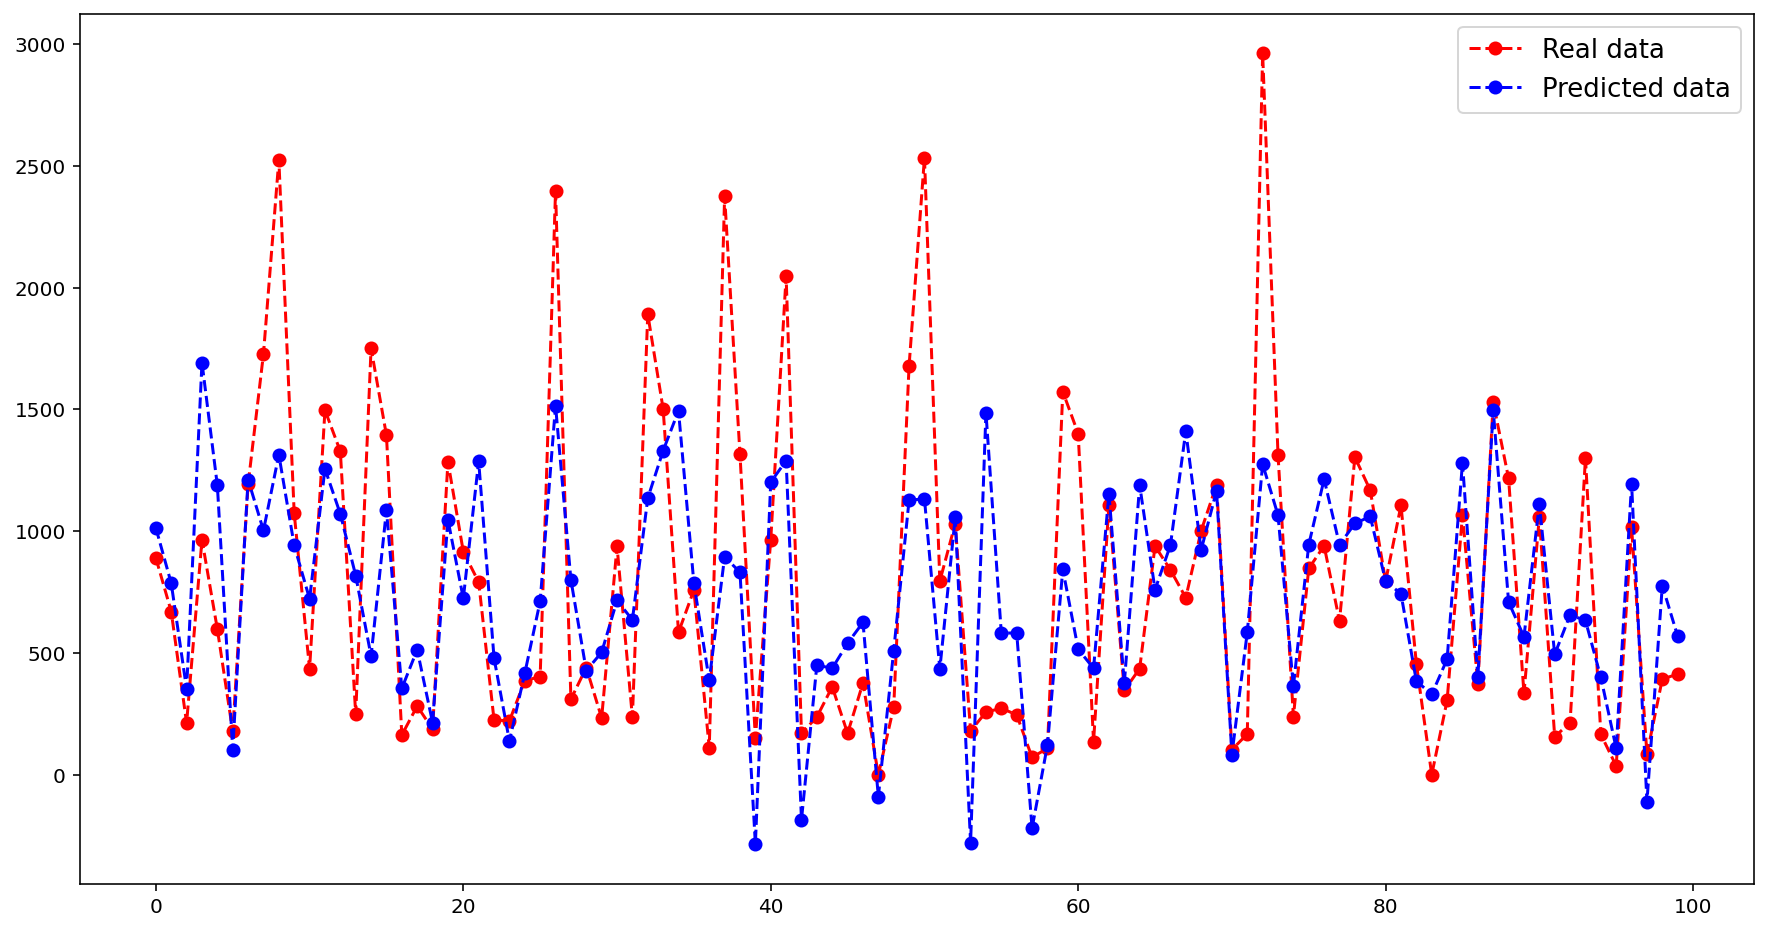

In [54]:
plt.figure(figsize=(15,8))
plt.plot(y_test.values[100:200], color = 'r', marker='o', linestyle='--', label = 'Real data')
plt.plot(y_pred_ridge[100:200], color = 'b', marker='o', linestyle='--', label = 'Predicted data')
plt.legend(fontsize=13)
plt.show()

# Regression tree

In [62]:
reg_tree = DecisionTreeRegressor()
reg_tree.fit(x_train, y_train)

DecisionTreeRegressor()

In [63]:
reg_tree.score(x_train, y_train), reg_tree.score(x_test, y_test)

(1.0, 0.7335282258647133)

In [64]:
y_pred_tree = reg_tree.predict(x_test)

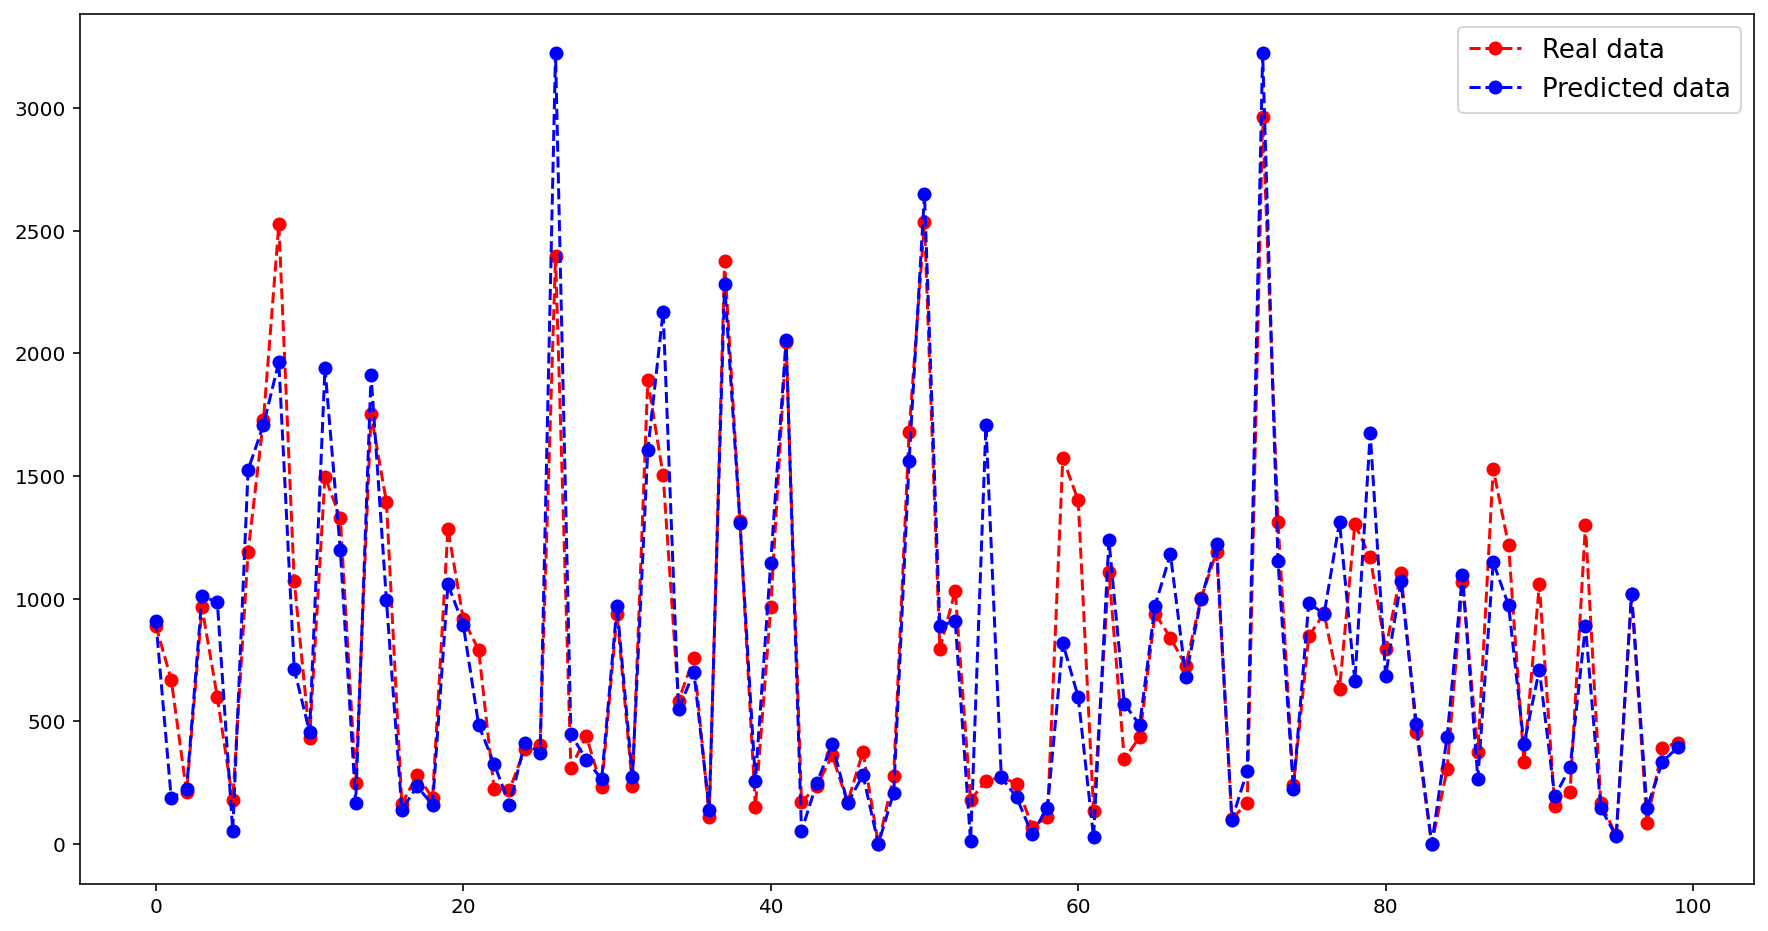

In [65]:
plt.figure(figsize=(15,8))
plt.plot(y_test.values[100:200], color = 'r', marker='o', linestyle='--', label = 'Real data')
plt.plot(y_pred_tree[100:200], color = 'b', marker='o', linestyle='--', label = 'Predicted data')
plt.legend(fontsize=13)
plt.show()

# Random Forest regression

In [66]:
reg_forest = RandomForestRegressor()
reg_forest.fit(x_train, y_train)

RandomForestRegressor()

In [67]:
reg_forest.score(x_train, y_train), reg_forest.score(x_test, y_test)

(0.9824285677200504, 0.8555079284422389)

In [68]:
y_pred_forest = reg_forest.predict(x_test)

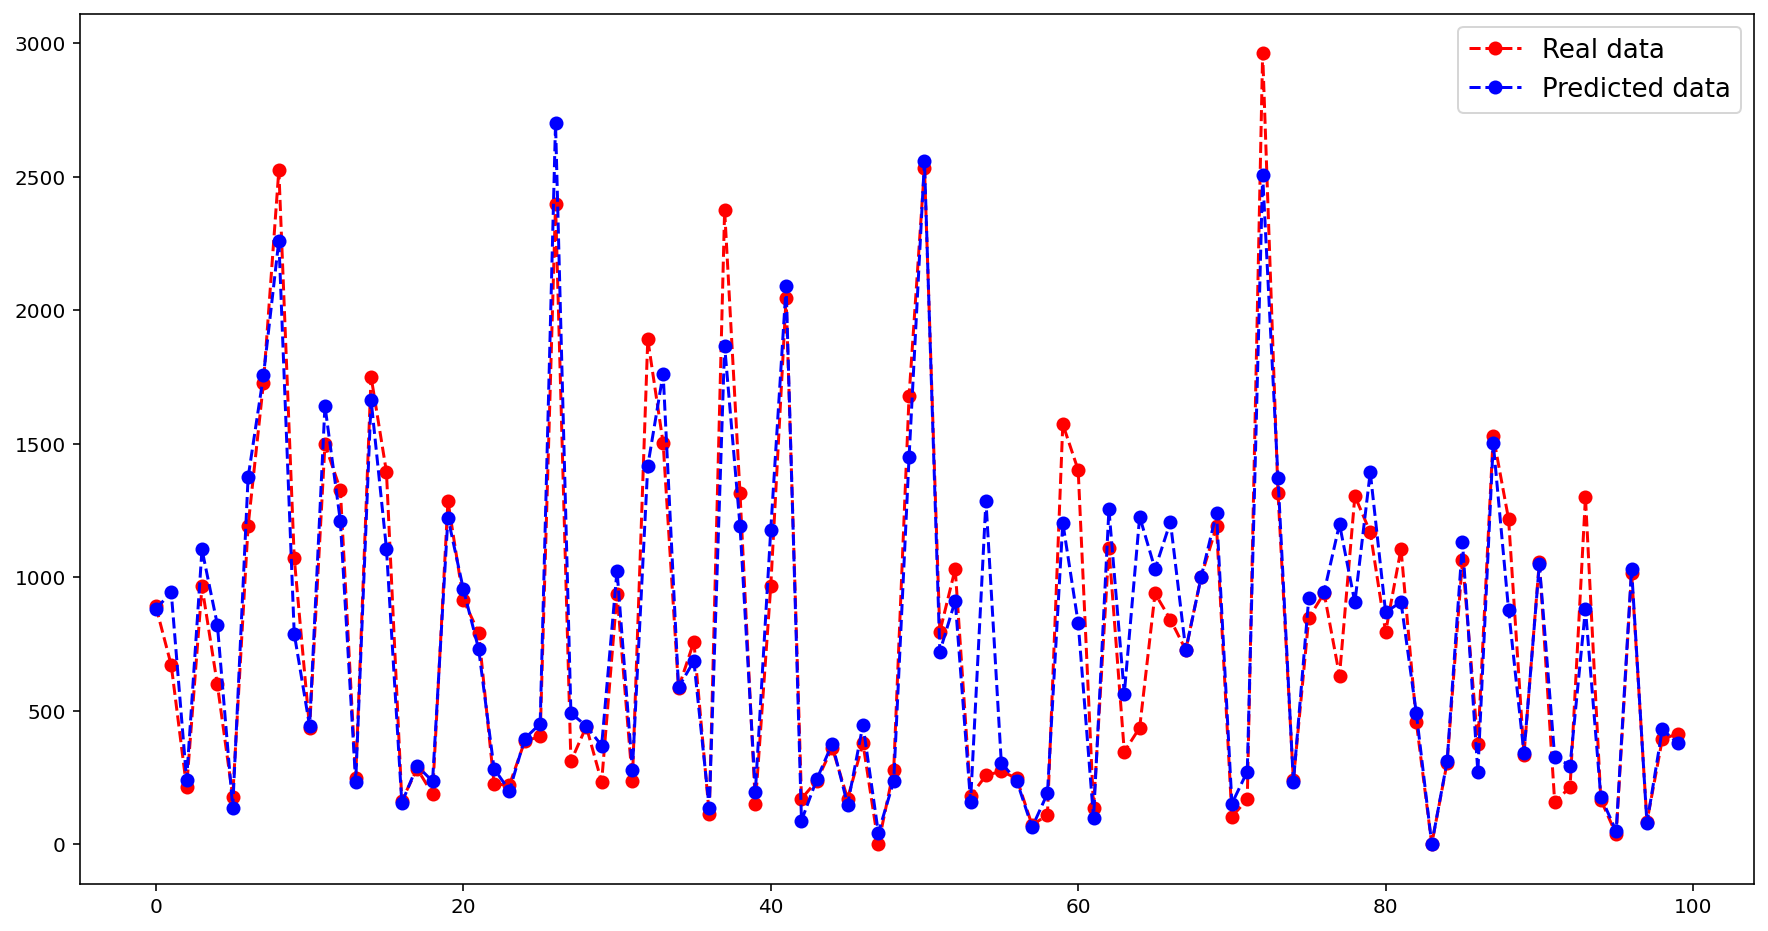

In [69]:
plt.figure(figsize=(15,8))
plt.plot(y_test.values[100:200], color = 'r', marker='o', linestyle='--', label = 'Real data')
plt.plot(y_pred_forest[100:200], color = 'b', marker='o', linestyle='--', label = 'Predicted data')
plt.legend(fontsize=13)
plt.show()

# Neural network

In [76]:
model = Sequential()

model.add(Dense(units = 128, activation='relu', input_dim=12))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam')

In [77]:
history = model.fit(x_train, y_train, batch_size = 25, epochs = 500, validation_data=(x_test, y_test), verbose=0)

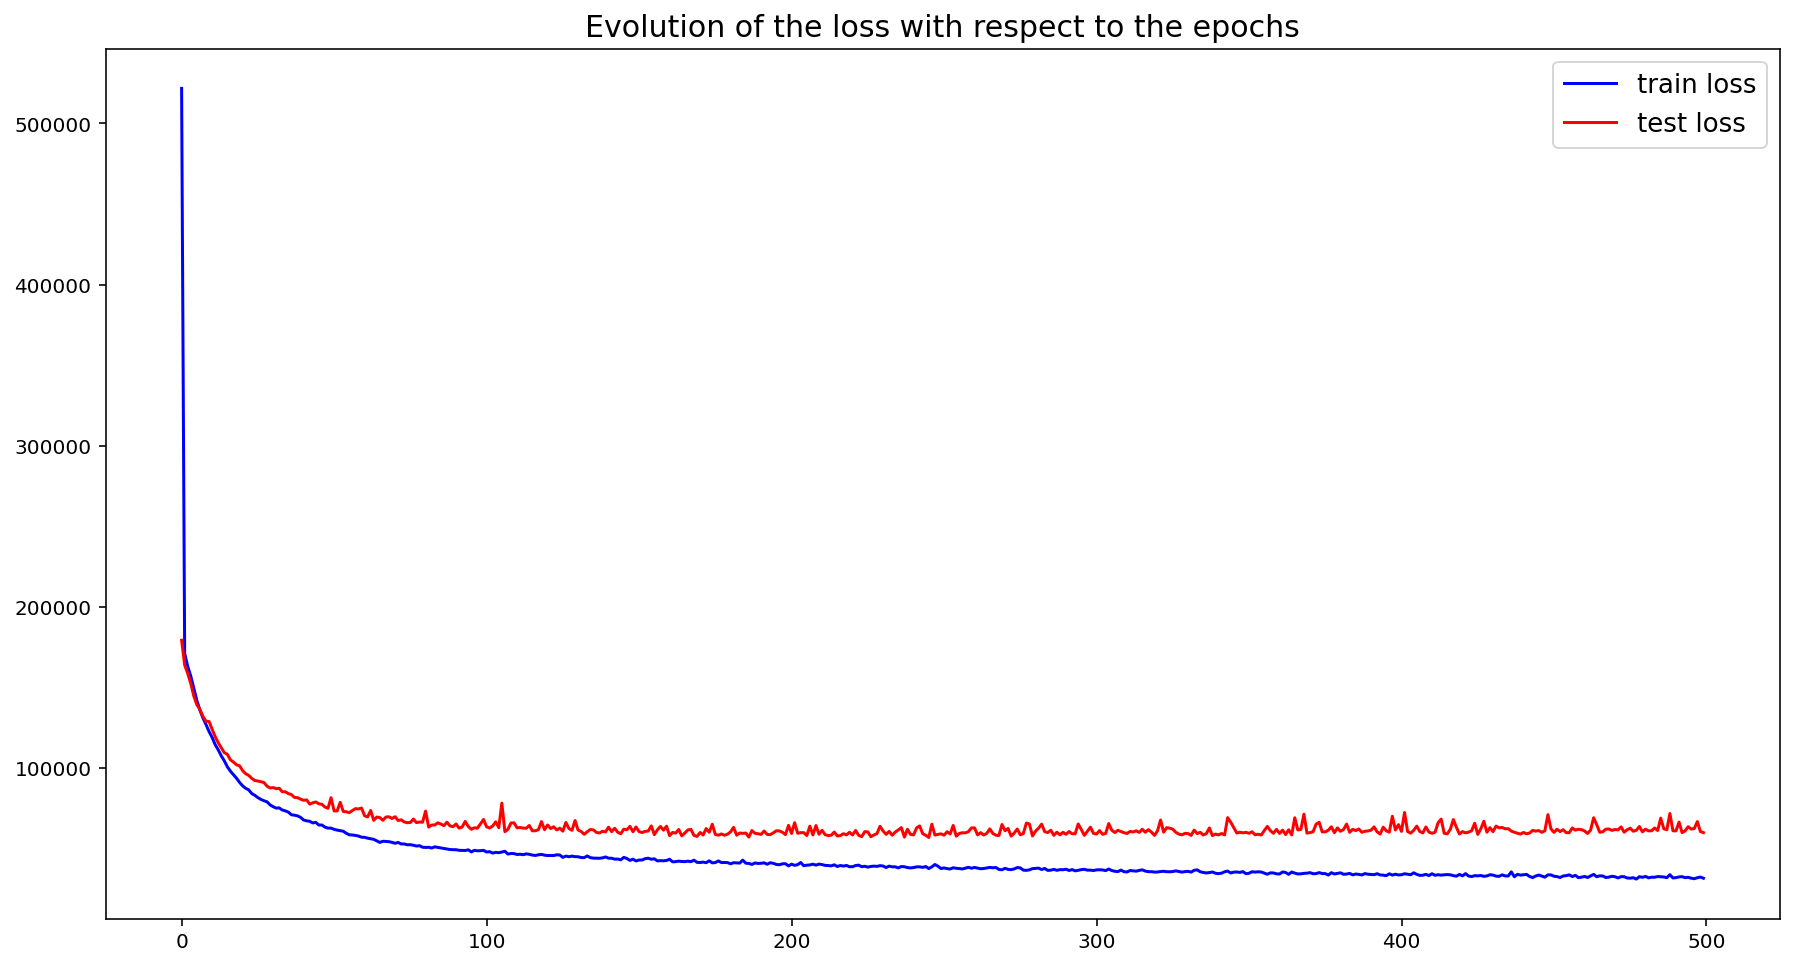

In [78]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.figure(figsize=(15,8))
plt.plot(loss, c='b', label='train loss')
plt.plot(val_loss, c='r', label='test loss')
plt.title('Evolution of the loss with respect to the epochs', size=15)
plt.legend(fontsize=13)
plt.show()

In [79]:
y_pred_NN = model.predict(x_test)

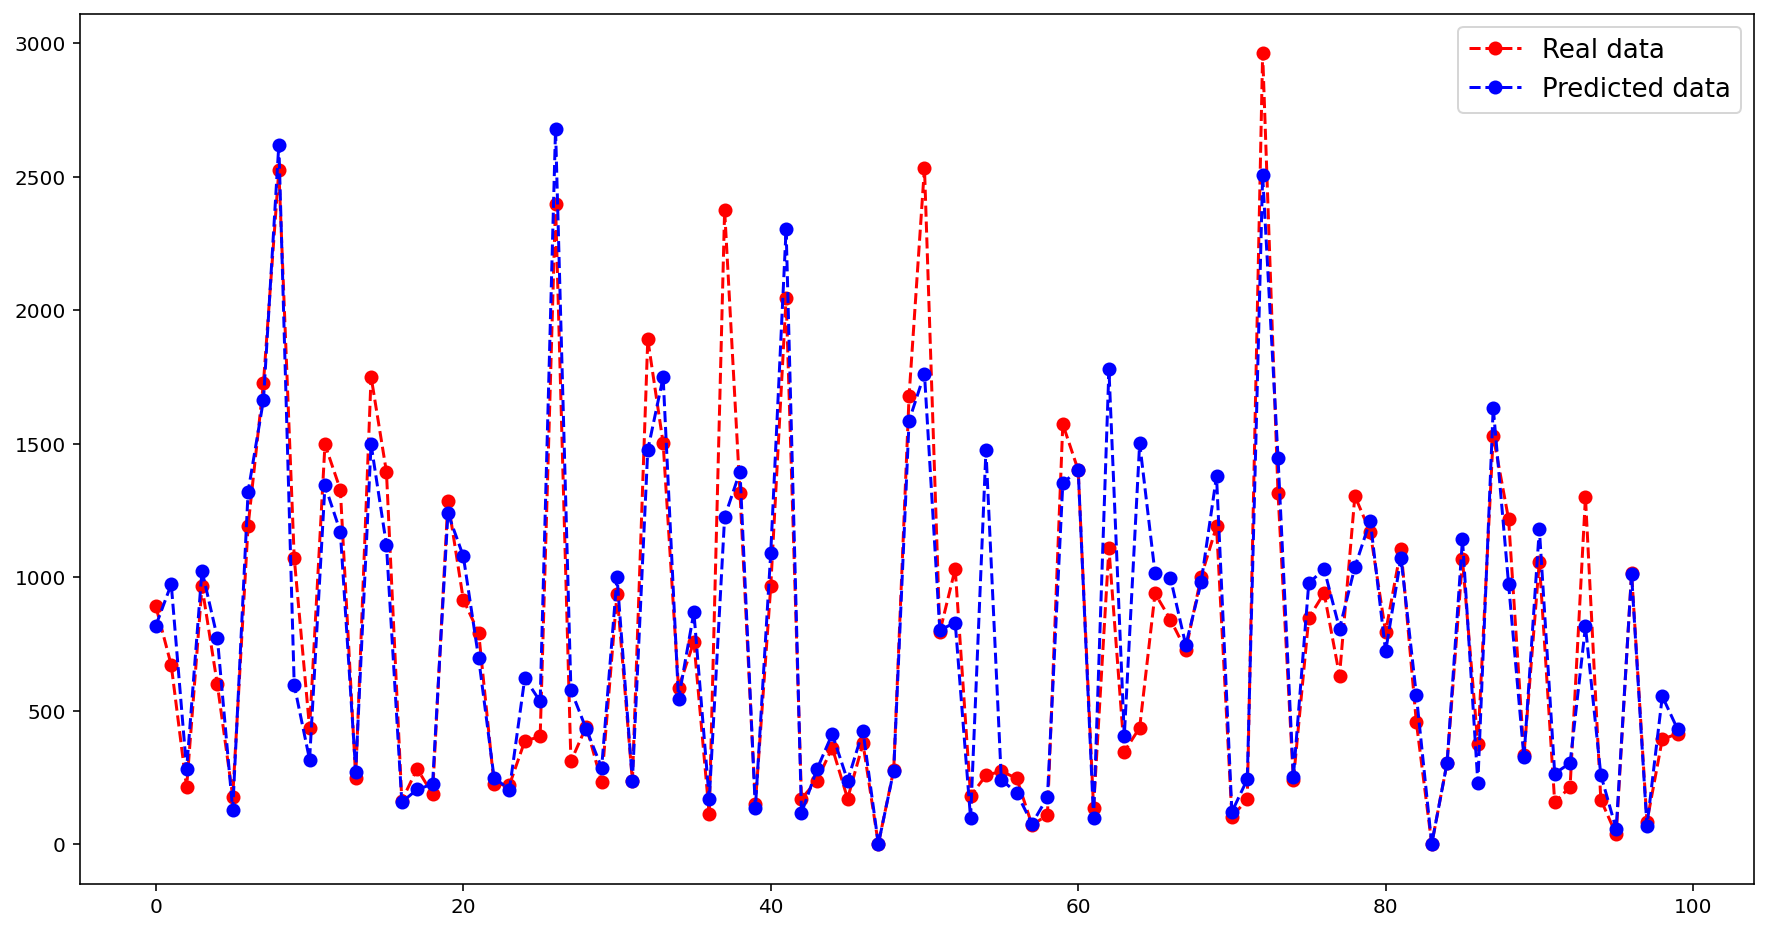

In [80]:
plt.figure(figsize=(15,8))
plt.plot(y_test.values[100:200], color = 'r', marker='o', linestyle='--', label = 'Real data')
plt.plot(y_pred_NN[100:200], color = 'b', marker='o', linestyle='--', label = 'Predicted data')
plt.legend(fontsize=13)
plt.show()

In [81]:
model.evaluate(x_test, y_test), model.evaluate(x_train, y_train)

184/184 [==============================] - 0s 901us/step - loss: 29269.4121


(59718.8671875, 29269.412109375)